In [1]:
from sklearn.datasets import load_iris
import sklearn as skl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


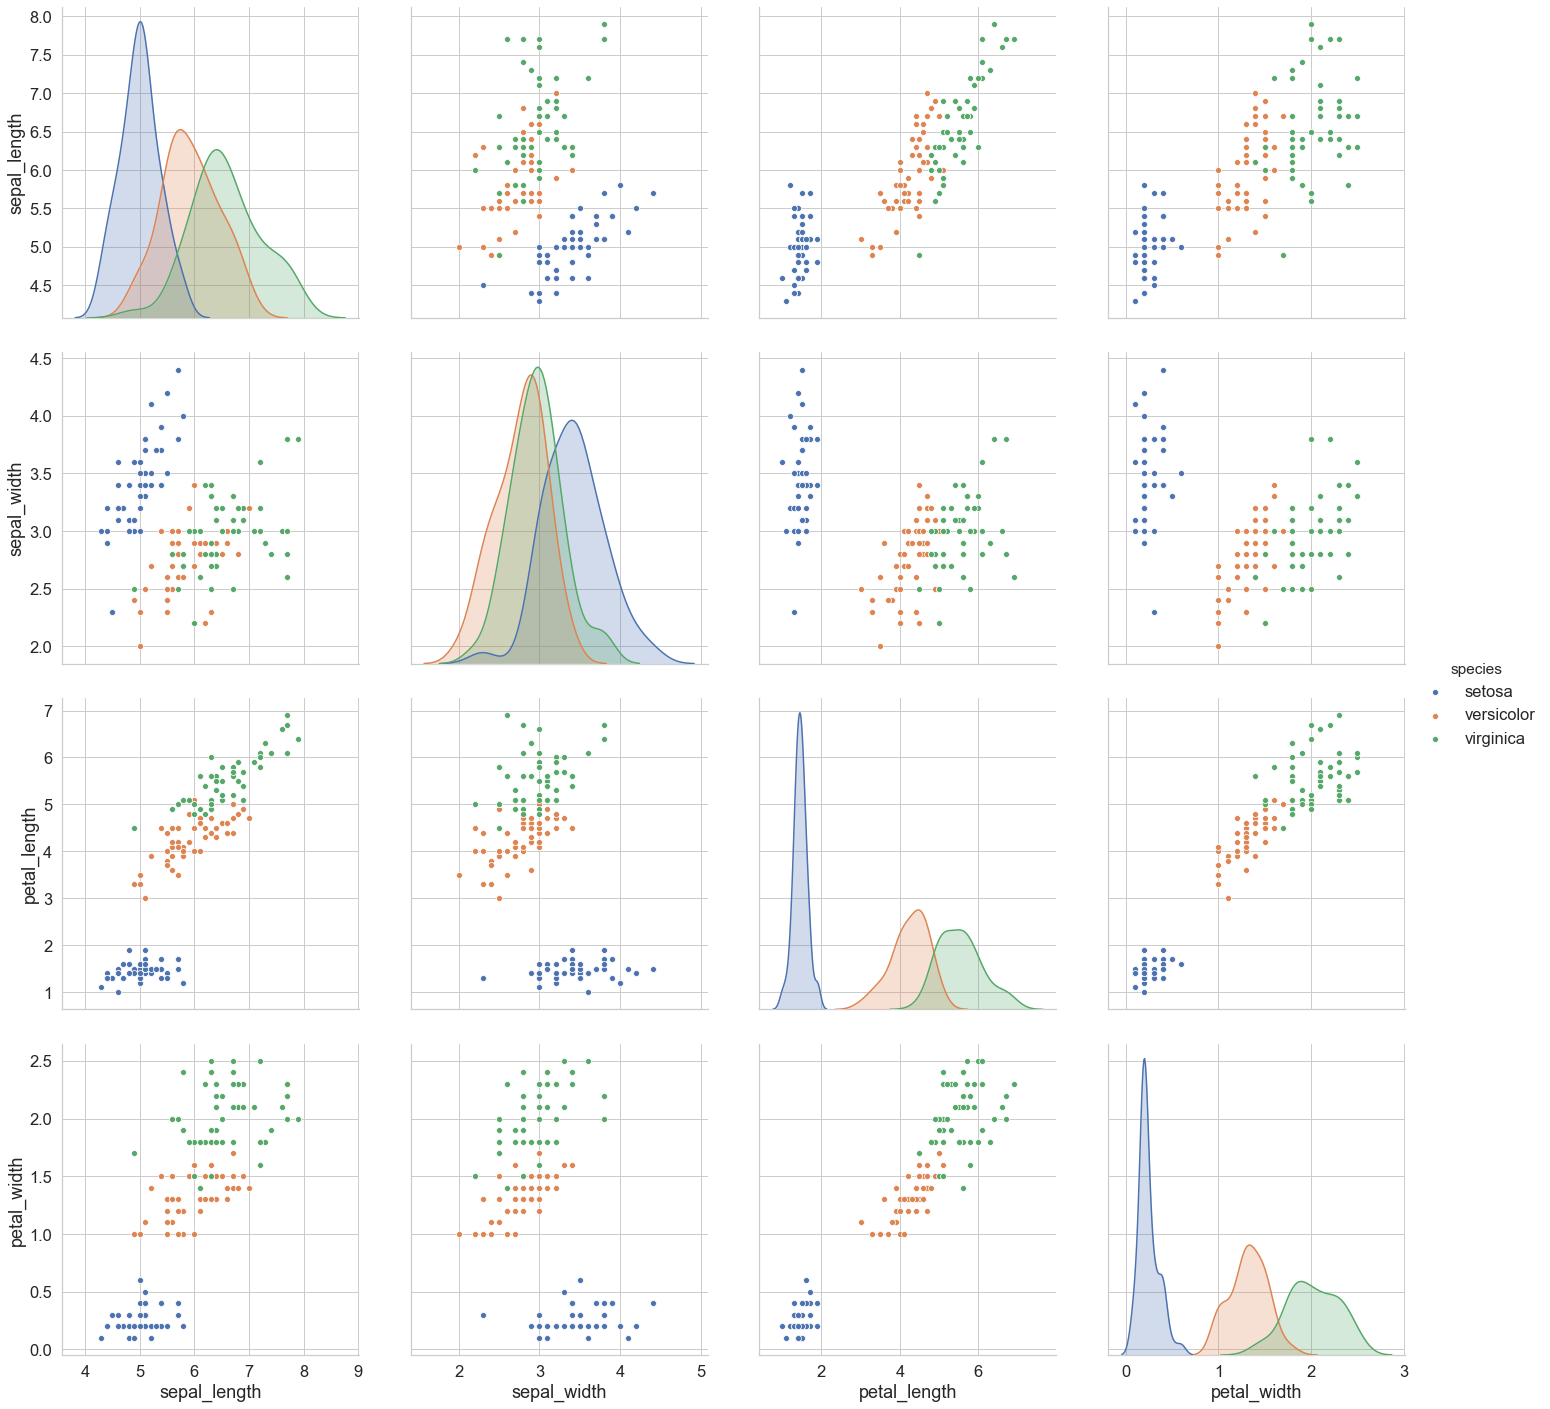

In [3]:
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.5, color_codes=True)


sns.pairplot(iris, hue='species', height=5, diag_kind='kde');

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [9]:
from sklearn.decomposition import PCA 

model = PCA(n_components=2) 
model.fit(X_iris)
X_2D = model.transform(X_iris)

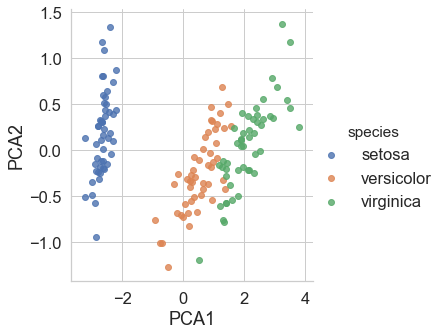

In [10]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

In [11]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')

model.fit(X_iris) 

y_gmm = model.predict(X_iris)

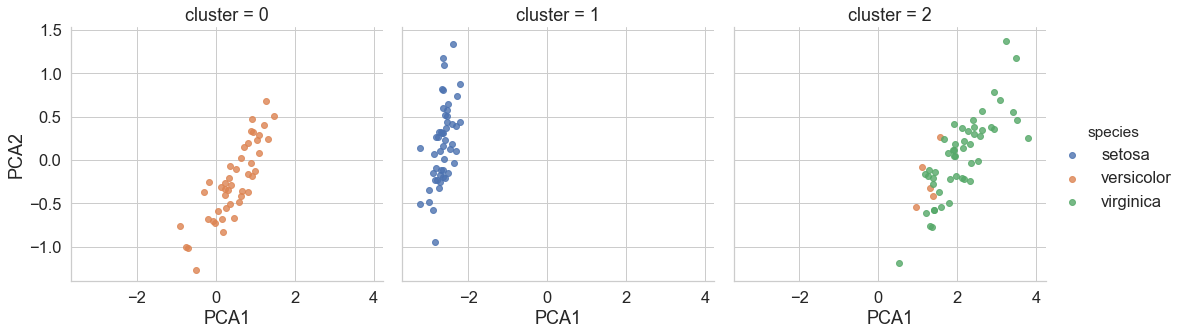

In [12]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

In [16]:
#from sklearn.cross_validation import train_test_split
# Разделяем данные: по 50% в каждом из наборов
X1, X2, y1, y2 = train_test_split(X_iris, y_iris, random_state=1, train_size=0.5)

y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)

accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.0, 0.0)

In [22]:
from sklearn.model_selection import cross_val_score 
cv_score = cross_val_score(GaussianNB(), X_iris, y_iris, cv=5)
cv_score.mean()

0.9533333333333334